In this notebook, we will create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

For my data:-https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

In [48]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('world_population.csv')
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


For my analysis, I will focus on the distribution of the population across different continents.

## Data Cleaing and Preparation

In [49]:
# Check for missing values
print(f"Missing values in each column:\n{data.isnull().sum()}")

# Check for duplicate values
print(f"Duplicate rows:\n{data.duplicated().sum()}")

Missing values in each column:
Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64
Duplicate rows:
0


The next step is data preparation is merging the total population for each continent.

In [50]:
# Merge population data by continent
continent_population = data.groupby('Continent')[['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']].sum().reset_index()

# # Reshape into long format for analysis
df_long = continent_population.melt(id_vars="Continent", var_name="Year", value_name="Population")
df_long["Year"] = df_long["Year"].str.extract('(\d{4})').astype(int)
df_long.head()

,Continent,Year,Population
0,Africa,2022,1426730932
1,Asia,2022,4721383274
2,Europe,2022,743147538
3,North America,2022,600296136
4,Oceania,2022,45038554


## Transformation
From the data, we will calculate the population growth and CAGR (Compound Annual Growth Rate) for each continent over the decades.
- CAGR (Compound Annual Growth Rate) is calculated using the formula: $\frac{Ending Value}{Beginning Value}\times\frac{1}{Number of Years}-1$
- CAGR is the average annual growth rate of an investment over a specified time period longer than one year.

Year,Continent,Growth_1970_2022_%,CAGR_1970_2022_%
0,Africa,290.409905,2.653887
1,Asia,120.120725,1.528889
2,Europe,13.297813,0.240384
3,North America,90.307634,1.245134
4,Oceania,131.200871,1.624822
5,South America,126.391835,1.583751


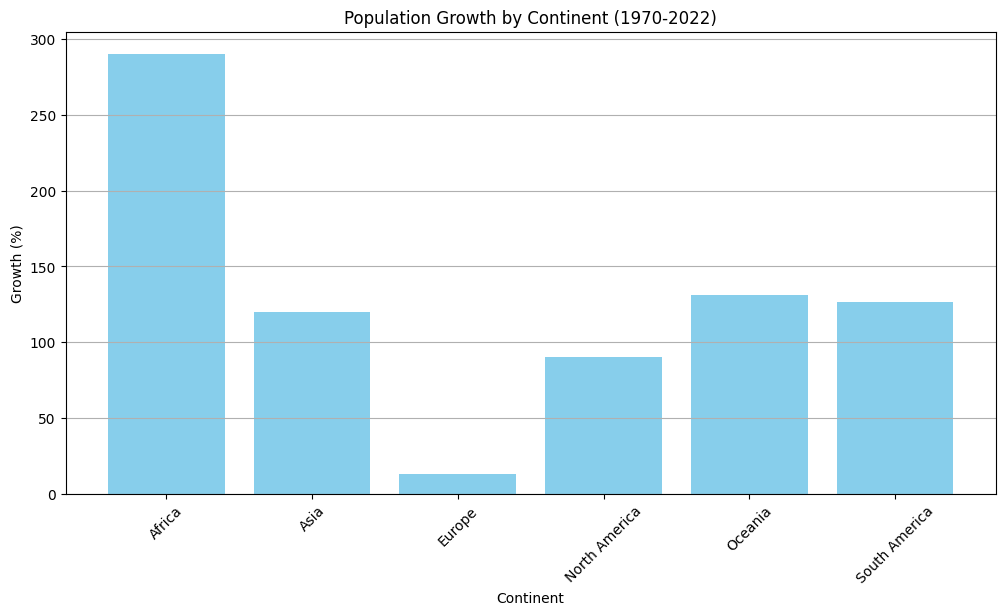

In [ ]:
# Reshape the DataFrame to have years as columns
df_wide = df_long.pivot(index="Continent", columns="Year", values="Population").reset_index()

# Growth from 1970 to 2022
df_wide["Growth_1970_2022_%"] = (df_wide[2022] - df_wide[1970]) / df_wide[1970] * 100

# CAGR from 1970 to 2022 (52 years)
df_wide["CAGR_1970_2022_%"] = ((df_wide[2022] / df_wide[1970]) ** (1/52) - 1) * 100
df_wide_summary = df_wide[["Continent", "Growth_1970_2022_%", "CAGR_1970_2022_%"]]
display(df_wide_summary)

# Visualizing Growth with bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_wide_summary["Continent"], df_wide_summary["Growth_1970_2022_%"], color='skyblue')
plt.title("Population Growth by Continent (1970-2022)")
plt.xlabel("Continent")
plt.ylabel("Growth (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Exploratory Data Analysis
**Comparing the trend of population**

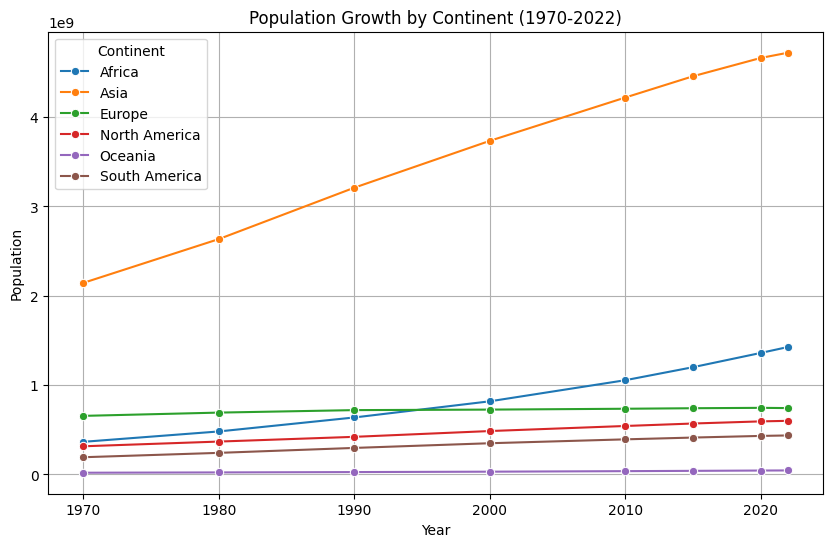

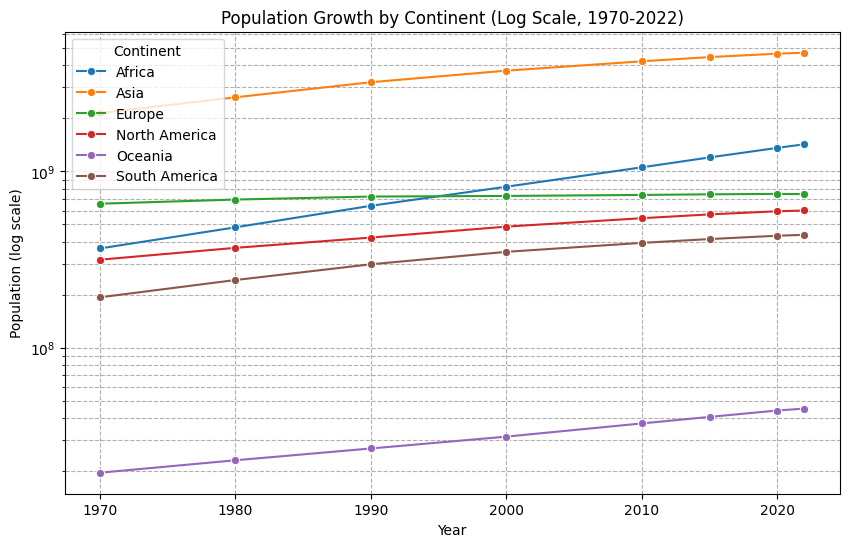

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_long, x="Year", y="Population", hue="Continent", marker="o")
plt.title("Population Growth by Continent (1970-2022)")
plt.ylabel("Population")
plt.grid(True)
plt.show()

# Visualizing Growth with log scale
plt.figure(figsize=(10,6))
sns.lineplot(data=df_long, x="Year", y="Population", hue="Continent", marker="o")
plt.yscale("log")
plt.title("Population Growth by Continent (Log Scale, 1970-2022)")
plt.ylabel("Population (log scale)")
plt.grid(True, which="both", ls="--")
plt.show()

,Continent,Year,Population,WorldPop,Share
0,Africa,2022,1426730932,7973413042,17.893604
1,Asia,2022,4721383274,7973413042,59.214081
2,Europe,2022,743147538,7973413042,9.320319
3,North America,2022,600296136,7973413042,7.528722
4,Oceania,2022,45038554,7973413042,0.564859


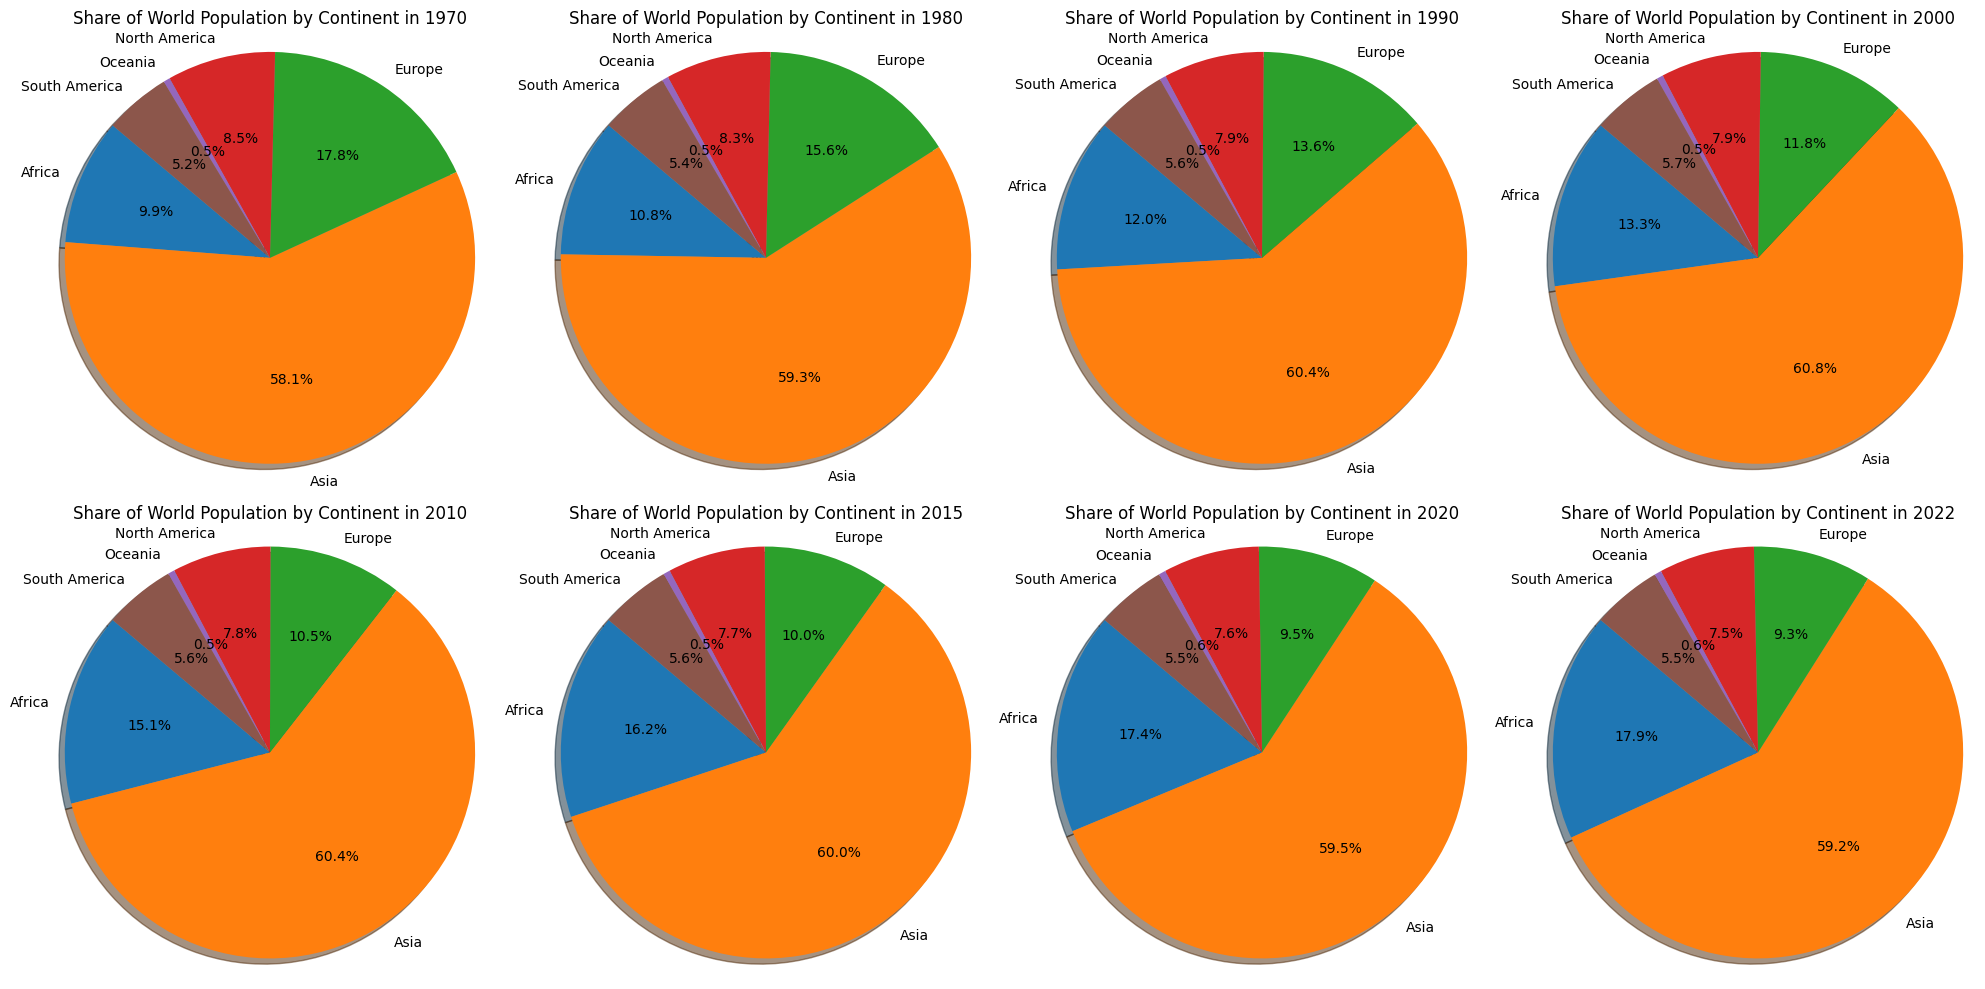

In [53]:
world_pop = df_long.groupby("Year")["Population"].sum().reset_index(name="WorldPop")
df_share = df_long.merge(world_pop, on="Year")
df_share["Share"] = df_share["Population"] / df_share["WorldPop"] * 100
display(df_share.head())

# Get the sorted list of unique years
years = sorted(df_share['Year'].unique())

# Create a figure and a set of subplots in a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate over each year and its corresponding axis to create a pie chart
for i, year in enumerate(years):
    ax = axes.flatten()[i]  # Get the current subplot axis
    df_year = df_share[df_share['Year'] == year]
    
    ax.pie(df_year['Share'], labels=df_year['Continent'], autopct='%1.1f%%', shadow=True, startangle=140)
    ax.set_title(f'Share of World Population by Continent in {year}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

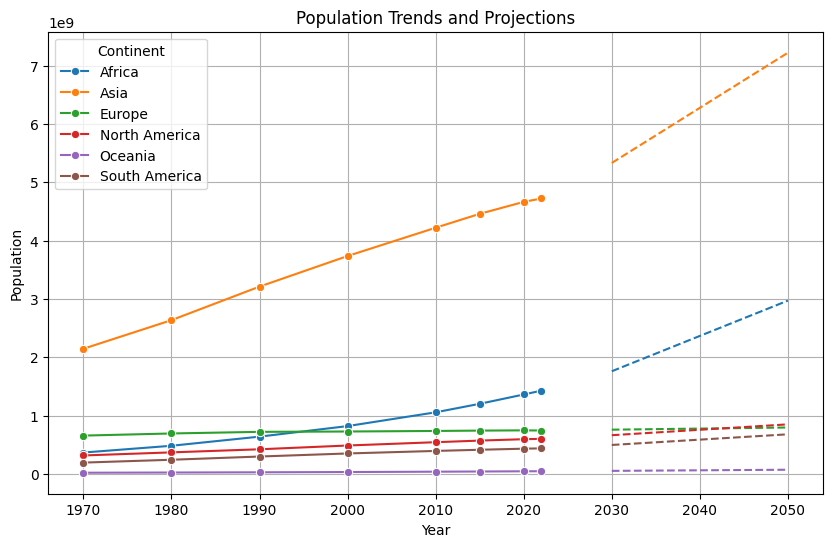

In [54]:
def project_growth(start_pop, CAGR, years):
    return start_pop * ((1 + CAGR/100) ** years)

projection_years = [2030, 2050]
projections = []

for _, row in df_wide.iterrows():
    for year in projection_years:
        years_passed = year - 2022
        proj_pop = project_growth(row[2022], row["CAGR_1970_2022_%"], years_passed)
        projections.append([row["Continent"], year, proj_pop])

df_proj = pd.DataFrame(projections, columns=["Continent", "Year", "ProjectedPop"])

plt.figure(figsize=(10,6))
sns.lineplot(data=df_long, x="Year", y="Population", hue="Continent", marker="o")
sns.lineplot(data=df_proj, x="Year", y="ProjectedPop", hue="Continent", linestyle="--", legend=False)
plt.title("Population Trends and Projections")
plt.ylabel("Population")
plt.grid(True)
plt.show()

## Key Insights
**From 1970:**
- Africa: Population exploded by +290% (fastest growth), CAGR ≈ 2.65% per year.
- Asia: +120% growth, CAGR ≈ 1.53%. Still the global giant in absolute numbers.
- Europe: Barely moved, only +13% growth, CAGR ≈ 0.24%. Basically flat.
- North America: +90% growth, CAGR ≈ 1.25%. Steady but modest.
- Oceania: +131% growth, CAGR ≈ 1.62%. Small base, but healthy growth.
- South America: +126% growth, CAGR ≈ 1.58%. Middle of the pack.

1) **Population Trends (1970–2022)**
- Africa and Asia surge, Europe flatlines, North America and South America grow steadily, Oceania rises slowly.

2) **Share of World Population**
- Asia dominates the world’s share across all years.
- Africa’s slice grows significantly, hinting at its demographic future.
- Europe’s share steadily shrinks.

3) **Projections (CAGR-based)**
- By 2030: Africa keeps accelerating, Europe stagnates, Asia still massive.
- By 2050: Africa becomes the key driver of global population growth, potentially overtaking Asia later in the century.